In [1405]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.metrics import make_scorer


In [976]:
data = np.loadtxt('../Data/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [977]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [978]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = SVR()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [986]:
# Create the random grid
param_grid = {'C': np.logspace(-5, 0, base=10, num=1000), 
              'kernel': ['linear','rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 0, base=10, num=50),
              'epsilon': np.logspace(-5, 0, base=10, num=50)} 
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1, 1),y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=82.5925925925926,
                                 epsilon=0.08217387387387387,
                                 gamma=0.04113693693693694),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01159111e-05, 1.02331658e-05, 1.03517796e-05,
       1.04717682e-05, 1.05931476e-05, 1.07159340e-05, 1.08401436e-05,
       1.09657929e-05, 1.1...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.543

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(C=82.5925925925926,
                                 epsilon=0.08217387387387387,
                                 gamma=0.04113693693693694),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01159111e-05, 1.02331658e-05, 1.03517796e-05,
       1.04717682e-05, 1.05931476e-05, 1.07159340e-05, 1.08401436e-05,
       1.09657929e-05, 1.1...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scori

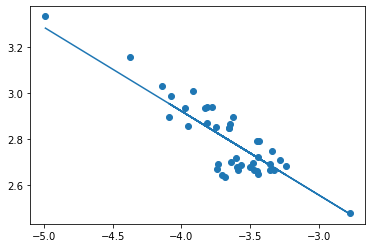

In [987]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [988]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.006469022324891943
Best hyperparameters:  {'kernel': 'linear', 'gamma': 0.000339322177189533, 'epsilon': 0.05963623316594643, 'C': 0.29817722900196736}


In [989]:
regressor = SVR(kernel='rbf',epsilon=0.08217387387387387, gamma = 0.04113693693693694, C=82.5925925925926)
regressor.fit(x_train.reshape(-1, 1),y_train)

SVR(C=82.5925925925926, epsilon=0.08217387387387387, gamma=0.04113693693693694)

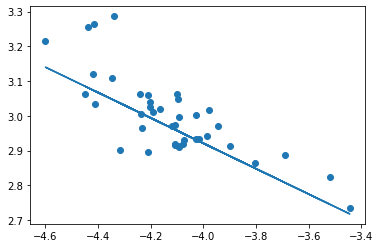

In [990]:
plt.scatter(x_stest,y_stest)
plt.plot(x_stest, model.predict(x_stest.reshape(-1,1)))

In [991]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test.reshape(-1,1)) - 10**y_test)**2))) # 1 is the best score

RMSE:  126.29321797480753


In [992]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest.reshape(-1,1)) - 10**y_stest)**2))) # 1 is the best score

RMSE:  205.76221965781912


In [1406]:
data = np.loadtxt('../Data/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [1407]:
cycle_life = np.log10(data[:,0])
DeltaQ_logVar = data[:,1]
DeltaQ_Min = np.log10(-data[:, 2])
DeltaQ_Skew = data[:, 3]
DeltaQ_Kurt = data[:, 4]
QD_Max_2 = data[:, 5]
QD_2 = data[:, 6]
slope_capacity_fade_2_100 = data[:, 7]
intercept_capacity_fade_2_100 = data[:, 8]
slope_capacity_fade_91_100 = data[:, 9]
intercept_capacity_91_100 = data[:, 10]
init_avg_charge_time = data[:, 11]
avg_T = data[:, 12]
min_IR = data[:, 13]
IR_100_2 = data[:, 14]

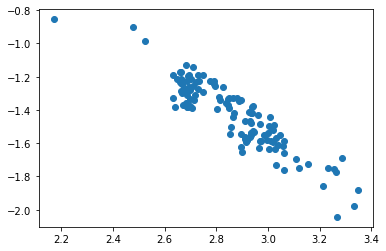

In [1408]:
plt.scatter(cycle_life, DeltaQ_Min)

In [1409]:
X = np.array([DeltaQ_logVar, DeltaQ_Min, DeltaQ_Skew, DeltaQ_Kurt]).transpose()

x_train = X[train_ind]
y_train = cycle_life[train_ind]


scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

x_test = X[test_ind]
y_test = cycle_life[test_ind]

x_test = scaler.transform(x_test)

x_stest = X[secondary_ind]
y_stest = cycle_life[secondary_ind]

x_stest = scaler.transform(x_stest)


print(np.average(X[:,0]))

-3.8331870629274194


In [1429]:
# Create the random grid

def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

regressor = SVR()

param_grid = {'C': np.logspace(0, 4, base=10, num=10000), 
              'kernel': ['linear','rbf', 'poly'],
              'gamma': np.logspace(-7, 0, base=10, num=10000),
              'epsilon':np.logspace(-7, 0, base=10, num=10000)} 
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 1.00092155e+00, 1.00184395e+00, ...,
       9.98159444e+03, 9.99079298e+03, 1.00000000e+04]),
                                        'epsilon': array([1.00000000e-07, 1.00161327e-07, 1.00322914e-07, ...,
       9.96781250e-01, 9.98389328e-01, 1.00000000e+00]),
                                        'gamma': array([1.00000000e-07, 1.00161

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 1.00092155e+00, 1.00184395e+00, ...,
       9.98159444e+03, 9.99079298e+03, 1.00000000e+04]),
                                        'epsilon': array([1.00000000e-07, 1.00161327e-07, 1.00322914e-07, ...,
       9.96781250e-01, 9.98389328e-01, 1.00000000e+00]),
                                        'gamma': array([1.00000000e-07, 1.00161327e-07, 1.00322914e-07, ...,
       9.96781250e-01, 9.98389328e-01, 1.00000000e+00]),
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [1424]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -121.29610076347907
Best hyperparameters:  {'kernel': 'linear', 'gamma': 3.0001827851307796e-06, 'epsilon': 0.0037158400018911237, 'C': 0.19625886500669212}


For [DeltaQ_logVar, DeltaQ_Skew, DeltaQ_Kurt], best hyperparameters are:

Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.002332044179521815, 'epsilon': 0.09503810972990007, 'C': 583.4136656680623}

X_train RMSE:  122.93807464710723

X_test RMSE:  188.2157241807487

X_stest RMSE:  305.2093728940464

X_test Percent error:  0.1738866614282433

X_stest Percent error:  0.187566947019498

For [DeltaQ_logVar, DeltaQ_Kurt, init_avg_charge_time, avg_T]: 

Best hyperparameters:  {'kernel': 'linear', 'gamma': 2.719157943036019e-06, 'epsilon': 0.04717084690917017, 'C': 4738.879609717651}

X_train RMSE:  107.90036461783839

X_test RMSE:  120.15175624430397

X_stest RMSE:  258.49048964866546

For [DeltaQ_logVar, DeltaQ_Min, IR_100_2]:

Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.008277856966198472, 'epsilon': 1.622595287078087e-05, 'C': 4.609604486828429}

X_train RMSE:  102.35978749051387

X_test RMSE:  124.01634371313186

X_stest RMSE:  187.05903826103471

X_test Percent error:  0.149976342387015

X_stest Percent error:  0.11370736614699026

In [1425]:
# Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.0071968567300115215, 'epsilon': 0.001757510624854793, 'C': 6.513490946272796}

regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], 
                gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train,y_train)

SVR(C=0.19625886500669212, epsilon=0.0037158400018911237,
    gamma=3.0001827851307796e-06, kernel='linear')

In [1426]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_train) - 10**y_train)**2))) 

RMSE:  115.09836468350206


In [1427]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test) - 10**y_test)**2))) 
# 1 is the best score

RMSE:  170.91765102568488


In [1428]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest) - 10**y_stest)**2))) 
# 1 is the best score

RMSE:  219.76223904132632


In [1416]:
print("Percent error: ", np.average(np.abs((10**regressor.predict(x_test) - 10**y_test)) / (10**y_test)))

Percent error:  0.1758566883817223
